# Generative Adeversarial Network (GAN)

![](../network1.png)

## Generator:
- input for generator: A d-dim noise vector
- output for generator: A fake images

## Discriminator:
- input: a real images or a fake image
- output: 1 if discriminator think input image is real, otherwise 0.

![](../network2.png)

## MNIST

### Generator
- input: a d-dim noise vector
- output: a 28 * 28  image

### Discriminator
- input: a real image from mnist dataset or a fake image from generator
- output: 1 or 0

![image.png](../step1-1.png)

## Dog GAN process
 
input for generator: noise vector;
output for generator: a 64 * 64 fake image

input for discriminator: fake image or a real dog image;
output: probability of 1 and 0, argmax(p(1), p(0))


The error is calculated and these are backpropagated through the discriminator, where the weights are updated.

![](../step1-2.png)

Next we train the generator. 

We take the batch of images that it created and put them through the discriminator again. We do not include the feature images. The generator learns by tricking the discriminator into it outputting false positives.

The discriminator will provide an output of probabilities. The values are then assessed and compared to what they should have been. 

Finally, The error is calculated and backpropagated through the generator and the weights are updated.

## Dog Images

### Image resizing
Since the requirement said "Your kernel's output must be called images.zip and contain 10,000 images sized **64x64**", thus we need to resize original picture to (64, 64)

In [89]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as pltimg
from glob import glob
import os, time
%matplotlib inline

In [25]:
# create 64*64 min dog images directory
# source_dir = "../dataset/generative-dog-images/all-dogs/"
# target = "all-dogs-64-64"
# original = 'all-dogs'
# output_dir = source_dir.replace(original, target)
# filenames = glob("{}/*".format(source_dir))

# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# print("------image resizing------")
# for file in filenames:
#     with Image.open(file) as img:
#         img.convert('RGB')
#         resized_img = img.resize((64,64))
#         output_dir = file.replace(original, target)
#         resized_img.save(output_dir)

------image resizing------


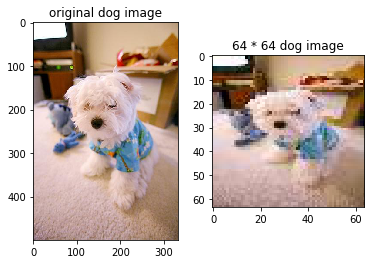

In [2]:
fig, ax = plt.subplots(1,2)
img = pltimg.imread('../dataset/generative-dog-images/all-dogs-64-64/n02085936_20610.jpg')
ax[1].imshow(img)
ax[1].set_title("64 * 64 dog image")

img1 = pltimg.imread("../dataset/generative-dog-images/all-dogs/n02085936_20610.jpg")
ax[0].imshow(img1)
ax[0].set_title("original dog image")
plt.show()

In [2]:
#define a function to read img file then return a (1, 12288) array
def read_file(filename):
    img = Image.open(filename)
    img.convert('RGB') #convert to RGB mode
    try:
        red, green, blue = img.split()
        
        red_arr = pltimg.pil_to_array(red)
        green_arr = pltimg.pil_to_array(green)
        blue_arr = pltimg.pil_to_array(blue)

        r_arr = red_arr.reshape(4096)
        g_arr = green_arr.reshape(4096)
        b_arr = blue_arr.reshape(4096)

        result = np.concatenate((r_arr, g_arr, b_arr))
        result = result.reshape((1,-1))
        return result

    except(ValueError):
        print(filename)

In [3]:
#define a function to read img file then return a (1, 12288) array
def read_file_mat(filename):
    img = pltimg.imread(filename)
    try:     
        result = img.reshape((1,-1))
        return result

    except(ValueError):
        print(filename)

In [40]:
res = read_file_mat("../dataset/generative-dog-images/all-dogs-64-64/n02085936_20610.jpg")

In [42]:
res

array([[254, 255, 239, ..., 119,  91,  70]], dtype=uint8)

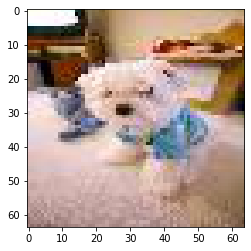

In [6]:
res = res.reshape((64, 64, 3))
plt.imshow(res)

## Problems
- There are pictures with more than one dog (even with 3 dogs);
- There are pictures with the dog (-s) and person (people);
- There are pictures with more than one person (even with 4 people);
- There are pictures where dogs occupy less than 1/5 of the picture;

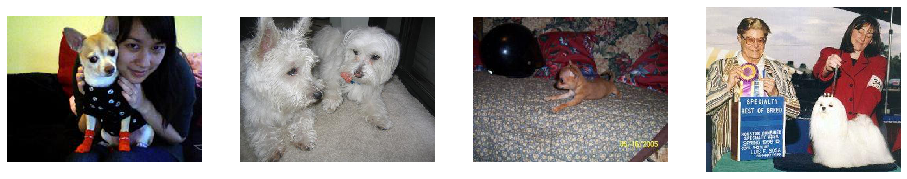

In [36]:
names = ['n02085620_7', 'n02085936_10610', 'n02085620_6399', 'n02085936_5067']
fig, ax = plt.subplots(1, 4, figsize=(16, 9))
for k,v in enumerate(names):
    
    img = pltimg.imread('../dataset/generative-dog-images/all-dogs/' + v + '.jpg')
    ax[k].imshow(img)
    ax[k].axis('off')
plt.show()

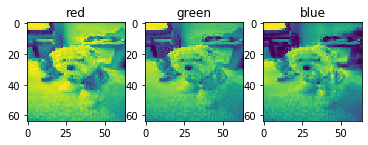

In [49]:
img = Image.open("../dataset/generative-dog-images/all-dogs-64-64/n02085936_20610.jpg")
red, green, blue = img.split()
red_arr = pltimg.pil_to_array(red)
green_arr = pltimg.pil_to_array(green)
blue_arr = pltimg.pil_to_array(blue)

r_arr = red_arr.reshape(4096)
g_arr = green_arr.reshape(4096)
b_arr = blue_arr.reshape(4096)

fig, ax = plt.subplots(1,3)
ax[1].imshow(g_arr.reshape((64,64)))
ax[1].set_title("green")

ax[0].imshow(r_arr.reshape((64, 64)))
ax[0].set_title("red")

ax[2].imshow(b_arr.reshape((64, 64)))
ax[2].set_title("blue")
plt.show()

In [63]:
# save all 64 * 64 dog files in numpy array matrix, shape should be (n, 12288)
source_dir = "../dataset/generative-dog-images/all-dogs-64-64//"
filenames = glob("{}/*".format(source_dir))
train_set = np.empty(shape=[0, 64*64*3])

count = 0
for file in filenames:
    print("this is {} image".format(count))
    file_array = read_file_mat(file)
    train_set = np.append(train_set, file_array, axis = 0)
    count = count + 1

this is 0 image
this is 1 image
this is 2 image
this is 3 image
this is 4 image
this is 5 image
this is 6 image
this is 7 image
this is 8 image
this is 9 image
this is 10 image
this is 11 image
this is 12 image
this is 13 image
this is 14 image
this is 15 image
this is 16 image
this is 17 image
this is 18 image
this is 19 image
this is 20 image
this is 21 image
this is 22 image
this is 23 image
this is 24 image
this is 25 image
this is 26 image
this is 27 image
this is 28 image
this is 29 image
this is 30 image
this is 31 image
this is 32 image
this is 33 image
this is 34 image
this is 35 image
this is 36 image
this is 37 image
this is 38 image
this is 39 image
this is 40 image
this is 41 image
this is 42 image
this is 43 image
this is 44 image
this is 45 image
this is 46 image
this is 47 image
this is 48 image
this is 49 image
this is 50 image
this is 51 image
this is 52 image
this is 53 image
this is 54 image
this is 55 image
this is 56 image
this is 57 image
this is 58 image
this is

this is 462 image
this is 463 image
this is 464 image
this is 465 image
this is 466 image
this is 467 image
this is 468 image
this is 469 image
this is 470 image
this is 471 image
this is 472 image
this is 473 image
this is 474 image
this is 475 image
this is 476 image
this is 477 image
this is 478 image
this is 479 image
this is 480 image
this is 481 image
this is 482 image
this is 483 image
this is 484 image
this is 485 image
this is 486 image
this is 487 image
this is 488 image
this is 489 image
this is 490 image
this is 491 image
this is 492 image
this is 493 image
this is 494 image
this is 495 image
this is 496 image
this is 497 image
this is 498 image
this is 499 image
this is 500 image
this is 501 image
this is 502 image
this is 503 image
this is 504 image
this is 505 image
this is 506 image
this is 507 image
this is 508 image
this is 509 image
this is 510 image
this is 511 image
this is 512 image
this is 513 image
this is 514 image
this is 515 image
this is 516 image
this is 51

this is 920 image
this is 921 image
this is 922 image
this is 923 image
this is 924 image
this is 925 image
this is 926 image
this is 927 image
this is 928 image
this is 929 image
this is 930 image
this is 931 image
this is 932 image
this is 933 image
this is 934 image
this is 935 image
this is 936 image
this is 937 image
this is 938 image
this is 939 image
this is 940 image
this is 941 image
this is 942 image
this is 943 image
this is 944 image
this is 945 image
this is 946 image
this is 947 image
this is 948 image
this is 949 image
this is 950 image
this is 951 image
this is 952 image
this is 953 image
this is 954 image
this is 955 image
this is 956 image
this is 957 image
this is 958 image
this is 959 image
this is 960 image
this is 961 image
this is 962 image
this is 963 image
this is 964 image
this is 965 image
this is 966 image
this is 967 image
this is 968 image
this is 969 image
this is 970 image
this is 971 image
this is 972 image
this is 973 image
this is 974 image
this is 97

this is 1356 image
this is 1357 image
this is 1358 image
this is 1359 image
this is 1360 image
this is 1361 image
this is 1362 image
this is 1363 image
this is 1364 image
this is 1365 image
this is 1366 image
this is 1367 image
this is 1368 image
this is 1369 image
this is 1370 image
this is 1371 image
this is 1372 image
this is 1373 image
this is 1374 image
this is 1375 image
this is 1376 image
this is 1377 image
this is 1378 image
this is 1379 image
this is 1380 image
this is 1381 image
this is 1382 image
this is 1383 image
this is 1384 image
this is 1385 image
this is 1386 image
this is 1387 image
this is 1388 image
this is 1389 image
this is 1390 image
this is 1391 image
this is 1392 image
this is 1393 image
this is 1394 image
this is 1395 image
this is 1396 image
this is 1397 image
this is 1398 image
this is 1399 image
this is 1400 image
this is 1401 image
this is 1402 image
this is 1403 image
this is 1404 image
this is 1405 image
this is 1406 image
this is 1407 image
this is 1408

this is 1788 image
this is 1789 image
this is 1790 image
this is 1791 image
this is 1792 image
this is 1793 image
this is 1794 image
this is 1795 image
this is 1796 image
this is 1797 image
this is 1798 image
this is 1799 image
this is 1800 image
this is 1801 image
this is 1802 image
this is 1803 image
this is 1804 image
this is 1805 image
this is 1806 image
this is 1807 image
this is 1808 image
this is 1809 image
this is 1810 image
this is 1811 image
this is 1812 image
this is 1813 image
this is 1814 image
this is 1815 image
this is 1816 image
this is 1817 image
this is 1818 image
this is 1819 image
this is 1820 image
this is 1821 image
this is 1822 image
this is 1823 image
this is 1824 image
this is 1825 image
this is 1826 image
this is 1827 image
this is 1828 image
this is 1829 image
this is 1830 image
this is 1831 image
this is 1832 image
this is 1833 image
this is 1834 image
this is 1835 image
this is 1836 image
this is 1837 image
this is 1838 image
this is 1839 image
this is 1840

this is 2220 image
this is 2221 image
this is 2222 image
this is 2223 image
this is 2224 image
this is 2225 image
this is 2226 image
this is 2227 image
this is 2228 image
this is 2229 image
this is 2230 image
this is 2231 image
this is 2232 image
this is 2233 image
this is 2234 image
this is 2235 image
this is 2236 image
this is 2237 image
this is 2238 image
this is 2239 image
this is 2240 image
this is 2241 image
this is 2242 image
this is 2243 image
this is 2244 image
this is 2245 image
this is 2246 image
this is 2247 image
this is 2248 image
this is 2249 image
this is 2250 image
this is 2251 image
this is 2252 image
this is 2253 image
this is 2254 image
this is 2255 image
this is 2256 image
this is 2257 image
this is 2258 image
this is 2259 image
this is 2260 image
this is 2261 image
this is 2262 image
this is 2263 image
this is 2264 image
this is 2265 image
this is 2266 image
this is 2267 image
this is 2268 image
this is 2269 image
this is 2270 image
this is 2271 image
this is 2272

this is 2652 image
this is 2653 image
this is 2654 image
this is 2655 image
this is 2656 image
this is 2657 image
this is 2658 image
this is 2659 image
this is 2660 image
this is 2661 image
this is 2662 image
this is 2663 image
this is 2664 image
this is 2665 image
this is 2666 image
this is 2667 image
this is 2668 image
this is 2669 image
this is 2670 image
this is 2671 image
this is 2672 image
this is 2673 image
this is 2674 image
this is 2675 image
this is 2676 image
this is 2677 image
this is 2678 image
this is 2679 image
this is 2680 image
this is 2681 image
this is 2682 image
this is 2683 image
this is 2684 image
this is 2685 image
this is 2686 image
this is 2687 image
this is 2688 image
this is 2689 image
this is 2690 image
this is 2691 image
this is 2692 image
this is 2693 image
this is 2694 image
this is 2695 image
this is 2696 image
this is 2697 image
this is 2698 image
this is 2699 image
this is 2700 image
this is 2701 image
this is 2702 image
this is 2703 image
this is 2704

this is 3084 image
this is 3085 image
this is 3086 image
this is 3087 image
this is 3088 image
this is 3089 image
this is 3090 image
this is 3091 image
this is 3092 image
this is 3093 image
this is 3094 image
this is 3095 image
this is 3096 image
this is 3097 image
this is 3098 image
this is 3099 image
this is 3100 image
this is 3101 image
this is 3102 image
this is 3103 image
this is 3104 image
this is 3105 image
this is 3106 image
this is 3107 image
this is 3108 image
this is 3109 image
this is 3110 image
this is 3111 image
this is 3112 image
this is 3113 image
this is 3114 image
this is 3115 image
this is 3116 image
this is 3117 image
this is 3118 image
this is 3119 image
this is 3120 image
this is 3121 image
this is 3122 image
this is 3123 image
this is 3124 image
this is 3125 image
this is 3126 image
this is 3127 image
this is 3128 image
this is 3129 image
this is 3130 image
this is 3131 image
this is 3132 image
this is 3133 image
this is 3134 image
this is 3135 image
this is 3136

this is 3516 image
this is 3517 image
this is 3518 image
this is 3519 image
this is 3520 image
this is 3521 image
this is 3522 image
this is 3523 image
this is 3524 image
this is 3525 image
this is 3526 image
this is 3527 image
this is 3528 image
this is 3529 image
this is 3530 image
this is 3531 image
this is 3532 image
this is 3533 image
this is 3534 image
this is 3535 image
this is 3536 image
this is 3537 image
this is 3538 image
this is 3539 image
this is 3540 image
this is 3541 image
this is 3542 image
this is 3543 image
this is 3544 image
this is 3545 image
this is 3546 image
this is 3547 image
this is 3548 image
this is 3549 image
this is 3550 image
this is 3551 image
this is 3552 image
this is 3553 image
this is 3554 image
this is 3555 image
this is 3556 image
this is 3557 image
this is 3558 image
this is 3559 image
this is 3560 image
this is 3561 image
this is 3562 image
this is 3563 image
this is 3564 image
this is 3565 image
this is 3566 image
this is 3567 image
this is 3568

this is 3948 image
this is 3949 image
this is 3950 image
this is 3951 image
this is 3952 image
this is 3953 image
this is 3954 image
this is 3955 image
this is 3956 image
this is 3957 image
this is 3958 image
this is 3959 image
this is 3960 image
this is 3961 image
this is 3962 image
this is 3963 image
this is 3964 image
this is 3965 image
this is 3966 image
this is 3967 image
this is 3968 image
this is 3969 image
this is 3970 image
this is 3971 image
this is 3972 image
this is 3973 image
this is 3974 image
this is 3975 image
this is 3976 image
this is 3977 image
this is 3978 image
this is 3979 image
this is 3980 image
this is 3981 image
this is 3982 image
this is 3983 image
this is 3984 image
this is 3985 image
this is 3986 image
this is 3987 image
this is 3988 image
this is 3989 image
this is 3990 image
this is 3991 image
this is 3992 image
this is 3993 image
this is 3994 image
this is 3995 image
this is 3996 image
this is 3997 image
this is 3998 image
this is 3999 image
this is 4000

this is 4380 image
this is 4381 image
this is 4382 image
this is 4383 image
this is 4384 image
this is 4385 image
this is 4386 image
this is 4387 image
this is 4388 image
this is 4389 image
this is 4390 image
this is 4391 image
this is 4392 image
this is 4393 image
this is 4394 image
this is 4395 image
this is 4396 image
this is 4397 image
this is 4398 image
this is 4399 image
this is 4400 image
this is 4401 image
this is 4402 image
this is 4403 image
this is 4404 image
this is 4405 image
this is 4406 image
this is 4407 image
this is 4408 image
this is 4409 image
this is 4410 image
this is 4411 image
this is 4412 image
this is 4413 image
this is 4414 image
this is 4415 image
this is 4416 image
this is 4417 image
this is 4418 image
this is 4419 image
this is 4420 image
this is 4421 image
this is 4422 image
this is 4423 image
this is 4424 image
this is 4425 image
this is 4426 image
this is 4427 image
this is 4428 image
this is 4429 image
this is 4430 image
this is 4431 image
this is 4432

this is 4812 image
this is 4813 image
this is 4814 image
this is 4815 image
this is 4816 image
this is 4817 image
this is 4818 image
this is 4819 image
this is 4820 image
this is 4821 image
this is 4822 image
this is 4823 image
this is 4824 image
this is 4825 image
this is 4826 image
this is 4827 image
this is 4828 image
this is 4829 image
this is 4830 image
this is 4831 image
this is 4832 image
this is 4833 image
this is 4834 image
this is 4835 image
this is 4836 image
this is 4837 image
this is 4838 image
this is 4839 image
this is 4840 image
this is 4841 image
this is 4842 image
this is 4843 image
this is 4844 image
this is 4845 image
this is 4846 image
this is 4847 image
this is 4848 image
this is 4849 image
this is 4850 image
this is 4851 image
this is 4852 image
this is 4853 image
this is 4854 image
this is 4855 image
this is 4856 image
this is 4857 image
this is 4858 image
this is 4859 image
this is 4860 image
this is 4861 image
this is 4862 image
this is 4863 image
this is 4864

this is 5244 image
this is 5245 image
this is 5246 image
this is 5247 image
this is 5248 image
this is 5249 image
this is 5250 image
this is 5251 image
this is 5252 image
this is 5253 image
this is 5254 image
this is 5255 image
this is 5256 image
this is 5257 image
this is 5258 image
this is 5259 image
this is 5260 image
this is 5261 image
this is 5262 image
this is 5263 image
this is 5264 image
this is 5265 image
this is 5266 image
this is 5267 image
this is 5268 image
this is 5269 image
this is 5270 image
this is 5271 image
this is 5272 image
this is 5273 image
this is 5274 image
this is 5275 image
this is 5276 image
this is 5277 image
this is 5278 image
this is 5279 image
this is 5280 image
this is 5281 image
this is 5282 image
this is 5283 image
this is 5284 image
this is 5285 image
this is 5286 image
this is 5287 image
this is 5288 image
this is 5289 image
this is 5290 image
this is 5291 image
this is 5292 image
this is 5293 image
this is 5294 image
this is 5295 image
this is 5296

this is 5676 image
this is 5677 image
this is 5678 image
this is 5679 image
this is 5680 image
this is 5681 image
this is 5682 image
this is 5683 image
this is 5684 image
this is 5685 image
this is 5686 image
this is 5687 image
this is 5688 image
this is 5689 image
this is 5690 image
this is 5691 image
this is 5692 image
this is 5693 image
this is 5694 image
this is 5695 image
this is 5696 image
this is 5697 image
this is 5698 image
this is 5699 image
this is 5700 image
this is 5701 image
this is 5702 image
this is 5703 image
this is 5704 image
this is 5705 image
this is 5706 image
this is 5707 image
this is 5708 image
this is 5709 image
this is 5710 image
this is 5711 image
this is 5712 image
this is 5713 image
this is 5714 image
this is 5715 image
this is 5716 image
this is 5717 image
this is 5718 image
this is 5719 image
this is 5720 image
this is 5721 image
this is 5722 image
this is 5723 image
this is 5724 image
this is 5725 image
this is 5726 image
this is 5727 image
this is 5728

this is 6108 image
this is 6109 image
this is 6110 image
this is 6111 image
this is 6112 image
this is 6113 image
this is 6114 image
this is 6115 image
this is 6116 image
this is 6117 image
this is 6118 image
this is 6119 image
this is 6120 image
this is 6121 image
this is 6122 image
this is 6123 image
this is 6124 image
this is 6125 image
this is 6126 image
this is 6127 image
this is 6128 image
this is 6129 image
this is 6130 image
this is 6131 image
this is 6132 image
this is 6133 image
this is 6134 image
this is 6135 image
this is 6136 image
this is 6137 image
this is 6138 image
this is 6139 image
this is 6140 image
this is 6141 image
this is 6142 image
this is 6143 image
this is 6144 image
this is 6145 image
this is 6146 image
this is 6147 image
this is 6148 image
this is 6149 image
this is 6150 image
this is 6151 image
this is 6152 image
this is 6153 image
this is 6154 image
this is 6155 image
this is 6156 image
this is 6157 image
this is 6158 image
this is 6159 image
this is 6160

this is 6540 image
this is 6541 image
this is 6542 image
this is 6543 image
this is 6544 image
this is 6545 image
this is 6546 image
this is 6547 image
this is 6548 image
this is 6549 image
this is 6550 image
this is 6551 image
this is 6552 image
this is 6553 image
this is 6554 image
this is 6555 image
this is 6556 image
this is 6557 image
this is 6558 image
this is 6559 image
this is 6560 image
this is 6561 image
this is 6562 image
this is 6563 image
this is 6564 image
this is 6565 image
this is 6566 image
this is 6567 image
this is 6568 image
this is 6569 image
this is 6570 image
this is 6571 image
this is 6572 image
this is 6573 image
this is 6574 image
this is 6575 image
this is 6576 image
this is 6577 image
this is 6578 image
this is 6579 image
this is 6580 image
this is 6581 image
this is 6582 image
this is 6583 image
this is 6584 image
this is 6585 image
this is 6586 image
this is 6587 image
this is 6588 image
this is 6589 image
this is 6590 image
this is 6591 image
this is 6592

this is 6972 image
this is 6973 image
this is 6974 image
this is 6975 image
this is 6976 image
this is 6977 image
this is 6978 image
this is 6979 image
this is 6980 image
this is 6981 image
this is 6982 image
this is 6983 image
this is 6984 image
this is 6985 image
this is 6986 image
this is 6987 image
this is 6988 image
this is 6989 image
this is 6990 image
this is 6991 image
this is 6992 image
this is 6993 image
this is 6994 image
this is 6995 image
this is 6996 image
this is 6997 image
this is 6998 image
this is 6999 image
this is 7000 image
this is 7001 image
this is 7002 image
this is 7003 image
this is 7004 image
this is 7005 image
this is 7006 image
this is 7007 image
this is 7008 image
this is 7009 image
this is 7010 image
this is 7011 image
this is 7012 image
this is 7013 image
this is 7014 image
this is 7015 image
this is 7016 image
this is 7017 image
this is 7018 image
this is 7019 image
this is 7020 image
this is 7021 image
this is 7022 image
this is 7023 image
this is 7024

this is 7404 image
this is 7405 image
this is 7406 image
this is 7407 image
this is 7408 image
this is 7409 image
this is 7410 image
this is 7411 image
this is 7412 image
this is 7413 image
this is 7414 image
this is 7415 image
this is 7416 image
this is 7417 image
this is 7418 image
this is 7419 image
this is 7420 image
this is 7421 image
this is 7422 image
this is 7423 image
this is 7424 image
this is 7425 image
this is 7426 image
this is 7427 image
this is 7428 image
this is 7429 image
this is 7430 image
this is 7431 image
this is 7432 image
this is 7433 image
this is 7434 image
this is 7435 image
this is 7436 image
this is 7437 image
this is 7438 image
this is 7439 image
this is 7440 image
this is 7441 image
this is 7442 image
this is 7443 image
this is 7444 image
this is 7445 image
this is 7446 image
this is 7447 image
this is 7448 image
this is 7449 image
this is 7450 image
this is 7451 image
this is 7452 image
this is 7453 image
this is 7454 image
this is 7455 image
this is 7456

this is 7836 image
this is 7837 image
this is 7838 image
this is 7839 image
this is 7840 image
this is 7841 image
this is 7842 image
this is 7843 image
this is 7844 image
this is 7845 image
this is 7846 image
this is 7847 image
this is 7848 image
this is 7849 image
this is 7850 image
this is 7851 image
this is 7852 image
this is 7853 image
this is 7854 image
this is 7855 image
this is 7856 image
this is 7857 image
this is 7858 image
this is 7859 image
this is 7860 image
this is 7861 image
this is 7862 image
this is 7863 image
this is 7864 image
this is 7865 image
this is 7866 image
this is 7867 image
this is 7868 image
this is 7869 image
this is 7870 image
this is 7871 image
this is 7872 image
this is 7873 image
this is 7874 image
this is 7875 image
this is 7876 image
this is 7877 image
this is 7878 image
this is 7879 image
this is 7880 image
this is 7881 image
this is 7882 image
this is 7883 image
this is 7884 image
this is 7885 image
this is 7886 image
this is 7887 image
this is 7888

this is 8268 image
this is 8269 image
this is 8270 image
this is 8271 image
this is 8272 image
this is 8273 image
this is 8274 image
this is 8275 image
this is 8276 image
this is 8277 image
this is 8278 image
this is 8279 image
this is 8280 image
this is 8281 image
this is 8282 image
this is 8283 image
this is 8284 image
this is 8285 image
this is 8286 image
this is 8287 image
this is 8288 image
this is 8289 image
this is 8290 image
this is 8291 image
this is 8292 image
this is 8293 image
this is 8294 image
this is 8295 image
this is 8296 image
this is 8297 image
this is 8298 image
this is 8299 image
this is 8300 image
this is 8301 image
this is 8302 image
this is 8303 image
this is 8304 image
this is 8305 image
this is 8306 image
this is 8307 image
this is 8308 image
this is 8309 image
this is 8310 image
this is 8311 image
this is 8312 image
this is 8313 image
this is 8314 image
this is 8315 image
this is 8316 image
this is 8317 image
this is 8318 image
this is 8319 image
this is 8320

this is 8700 image
this is 8701 image
this is 8702 image
this is 8703 image
this is 8704 image
this is 8705 image
this is 8706 image
this is 8707 image
this is 8708 image
this is 8709 image
this is 8710 image
this is 8711 image
this is 8712 image
this is 8713 image
this is 8714 image
this is 8715 image
this is 8716 image
this is 8717 image
this is 8718 image
this is 8719 image
this is 8720 image
this is 8721 image
this is 8722 image
this is 8723 image
this is 8724 image
this is 8725 image
this is 8726 image
this is 8727 image
this is 8728 image
this is 8729 image
this is 8730 image
this is 8731 image
this is 8732 image
this is 8733 image
this is 8734 image
this is 8735 image
this is 8736 image
this is 8737 image
this is 8738 image
this is 8739 image
this is 8740 image
this is 8741 image
this is 8742 image
this is 8743 image
this is 8744 image
this is 8745 image
this is 8746 image
this is 8747 image
this is 8748 image
this is 8749 image
this is 8750 image
this is 8751 image
this is 8752

this is 9132 image
this is 9133 image
this is 9134 image
this is 9135 image
this is 9136 image
this is 9137 image
this is 9138 image
this is 9139 image
this is 9140 image
this is 9141 image
this is 9142 image
this is 9143 image
this is 9144 image
this is 9145 image
this is 9146 image
this is 9147 image
this is 9148 image
this is 9149 image
this is 9150 image
this is 9151 image
this is 9152 image
this is 9153 image
this is 9154 image
this is 9155 image
this is 9156 image
this is 9157 image
this is 9158 image
this is 9159 image
this is 9160 image
this is 9161 image
this is 9162 image
this is 9163 image
this is 9164 image
this is 9165 image
this is 9166 image
this is 9167 image
this is 9168 image
this is 9169 image
this is 9170 image
this is 9171 image
this is 9172 image
this is 9173 image
this is 9174 image
this is 9175 image
this is 9176 image
this is 9177 image
this is 9178 image
this is 9179 image
this is 9180 image
this is 9181 image
this is 9182 image
this is 9183 image
this is 9184

this is 9564 image
this is 9565 image
this is 9566 image
this is 9567 image
this is 9568 image
this is 9569 image
this is 9570 image
this is 9571 image
this is 9572 image
this is 9573 image
this is 9574 image
this is 9575 image
this is 9576 image
this is 9577 image
this is 9578 image
this is 9579 image
this is 9580 image
this is 9581 image
this is 9582 image
this is 9583 image
this is 9584 image
this is 9585 image
this is 9586 image
this is 9587 image
this is 9588 image
this is 9589 image
this is 9590 image
this is 9591 image
this is 9592 image
this is 9593 image
this is 9594 image
this is 9595 image
this is 9596 image
this is 9597 image
this is 9598 image
this is 9599 image
this is 9600 image
this is 9601 image
this is 9602 image
this is 9603 image
this is 9604 image
this is 9605 image
this is 9606 image
this is 9607 image
this is 9608 image
this is 9609 image
this is 9610 image
this is 9611 image
this is 9612 image
this is 9613 image
this is 9614 image
this is 9615 image
this is 9616

this is 9996 image
this is 9997 image
this is 9998 image
this is 9999 image
this is 10000 image
this is 10001 image
this is 10002 image
this is 10003 image
this is 10004 image
this is 10005 image
this is 10006 image
this is 10007 image
this is 10008 image
this is 10009 image
this is 10010 image
this is 10011 image
this is 10012 image
this is 10013 image
this is 10014 image
this is 10015 image
this is 10016 image
this is 10017 image
this is 10018 image
this is 10019 image
this is 10020 image
this is 10021 image
this is 10022 image
this is 10023 image
this is 10024 image
this is 10025 image
this is 10026 image
this is 10027 image
this is 10028 image
this is 10029 image
this is 10030 image
this is 10031 image
this is 10032 image
this is 10033 image
this is 10034 image
this is 10035 image
this is 10036 image
this is 10037 image
this is 10038 image
this is 10039 image
this is 10040 image
this is 10041 image
this is 10042 image
this is 10043 image
this is 10044 image
this is 10045 image
this

this is 10406 image
this is 10407 image
this is 10408 image
this is 10409 image
this is 10410 image
this is 10411 image
this is 10412 image
this is 10413 image
this is 10414 image
this is 10415 image
this is 10416 image
this is 10417 image
this is 10418 image
this is 10419 image
this is 10420 image
this is 10421 image
this is 10422 image
this is 10423 image
this is 10424 image
this is 10425 image
this is 10426 image
this is 10427 image
this is 10428 image
this is 10429 image
this is 10430 image
this is 10431 image
this is 10432 image
this is 10433 image
this is 10434 image
this is 10435 image
this is 10436 image
this is 10437 image
this is 10438 image
this is 10439 image
this is 10440 image
this is 10441 image
this is 10442 image
this is 10443 image
this is 10444 image
this is 10445 image
this is 10446 image
this is 10447 image
this is 10448 image
this is 10449 image
this is 10450 image
this is 10451 image
this is 10452 image
this is 10453 image
this is 10454 image
this is 10455 image


this is 10816 image
this is 10817 image
this is 10818 image
this is 10819 image
this is 10820 image
this is 10821 image
this is 10822 image
this is 10823 image
this is 10824 image
this is 10825 image
this is 10826 image
this is 10827 image
this is 10828 image
this is 10829 image
this is 10830 image
this is 10831 image
this is 10832 image
this is 10833 image
this is 10834 image
this is 10835 image
this is 10836 image
this is 10837 image
this is 10838 image
this is 10839 image
this is 10840 image
this is 10841 image
this is 10842 image
this is 10843 image
this is 10844 image
this is 10845 image
this is 10846 image
this is 10847 image
this is 10848 image
this is 10849 image
this is 10850 image
this is 10851 image
this is 10852 image
this is 10853 image
this is 10854 image
this is 10855 image
this is 10856 image
this is 10857 image
this is 10858 image
this is 10859 image
this is 10860 image
this is 10861 image
this is 10862 image
this is 10863 image
this is 10864 image
this is 10865 image


this is 11226 image
this is 11227 image
this is 11228 image
this is 11229 image
this is 11230 image
this is 11231 image
this is 11232 image
this is 11233 image
this is 11234 image
this is 11235 image
this is 11236 image
this is 11237 image
this is 11238 image
this is 11239 image
this is 11240 image
this is 11241 image
this is 11242 image
this is 11243 image
this is 11244 image
this is 11245 image
this is 11246 image
this is 11247 image
this is 11248 image
this is 11249 image
this is 11250 image
this is 11251 image
this is 11252 image
this is 11253 image
this is 11254 image
this is 11255 image
this is 11256 image
this is 11257 image
this is 11258 image
this is 11259 image
this is 11260 image
this is 11261 image
this is 11262 image
this is 11263 image
this is 11264 image
this is 11265 image
this is 11266 image
this is 11267 image
this is 11268 image
this is 11269 image
this is 11270 image
this is 11271 image
this is 11272 image
this is 11273 image
this is 11274 image
this is 11275 image


this is 11636 image
this is 11637 image
this is 11638 image
this is 11639 image
this is 11640 image
this is 11641 image
this is 11642 image
this is 11643 image
this is 11644 image
this is 11645 image
this is 11646 image
this is 11647 image
this is 11648 image
this is 11649 image
this is 11650 image
this is 11651 image
this is 11652 image
this is 11653 image
this is 11654 image
this is 11655 image
this is 11656 image
this is 11657 image
this is 11658 image
this is 11659 image
this is 11660 image
this is 11661 image
this is 11662 image
this is 11663 image
this is 11664 image
this is 11665 image
this is 11666 image
this is 11667 image
this is 11668 image
this is 11669 image
this is 11670 image
this is 11671 image
this is 11672 image
this is 11673 image
this is 11674 image
this is 11675 image
this is 11676 image
this is 11677 image
this is 11678 image
this is 11679 image
this is 11680 image
this is 11681 image
this is 11682 image
this is 11683 image
this is 11684 image
this is 11685 image


this is 12046 image
this is 12047 image
this is 12048 image
this is 12049 image
this is 12050 image
this is 12051 image
this is 12052 image
this is 12053 image
this is 12054 image
this is 12055 image
this is 12056 image
this is 12057 image
this is 12058 image
this is 12059 image
this is 12060 image
this is 12061 image
this is 12062 image
this is 12063 image
this is 12064 image
this is 12065 image
this is 12066 image
this is 12067 image
this is 12068 image
this is 12069 image
this is 12070 image
this is 12071 image
this is 12072 image
this is 12073 image
this is 12074 image
this is 12075 image
this is 12076 image
this is 12077 image
this is 12078 image
this is 12079 image
this is 12080 image
this is 12081 image
this is 12082 image
this is 12083 image
this is 12084 image
this is 12085 image
this is 12086 image
this is 12087 image
this is 12088 image
this is 12089 image
this is 12090 image
this is 12091 image
this is 12092 image
this is 12093 image
this is 12094 image
this is 12095 image


this is 12456 image
this is 12457 image
this is 12458 image
this is 12459 image
this is 12460 image
this is 12461 image
this is 12462 image
this is 12463 image
this is 12464 image
this is 12465 image
this is 12466 image
this is 12467 image
this is 12468 image
this is 12469 image
this is 12470 image
this is 12471 image
this is 12472 image
this is 12473 image
this is 12474 image
this is 12475 image
this is 12476 image
this is 12477 image
this is 12478 image
this is 12479 image
this is 12480 image
this is 12481 image
this is 12482 image
this is 12483 image
this is 12484 image
this is 12485 image
this is 12486 image
this is 12487 image
this is 12488 image
this is 12489 image
this is 12490 image
this is 12491 image
this is 12492 image
this is 12493 image
this is 12494 image
this is 12495 image
this is 12496 image
this is 12497 image
this is 12498 image
this is 12499 image
this is 12500 image
this is 12501 image
this is 12502 image
this is 12503 image
this is 12504 image
this is 12505 image


this is 12866 image
this is 12867 image
this is 12868 image
this is 12869 image
this is 12870 image
this is 12871 image
this is 12872 image
this is 12873 image
this is 12874 image
this is 12875 image
this is 12876 image
this is 12877 image
this is 12878 image
this is 12879 image
this is 12880 image
this is 12881 image
this is 12882 image
this is 12883 image
this is 12884 image
this is 12885 image
this is 12886 image
this is 12887 image
this is 12888 image
this is 12889 image
this is 12890 image
this is 12891 image
this is 12892 image
this is 12893 image
this is 12894 image
this is 12895 image
this is 12896 image
this is 12897 image
this is 12898 image
this is 12899 image
this is 12900 image
this is 12901 image
this is 12902 image
this is 12903 image
this is 12904 image
this is 12905 image
this is 12906 image
this is 12907 image
this is 12908 image
this is 12909 image
this is 12910 image
this is 12911 image
this is 12912 image
this is 12913 image
this is 12914 image
this is 12915 image


this is 13276 image
this is 13277 image
this is 13278 image
this is 13279 image
this is 13280 image
this is 13281 image
this is 13282 image
this is 13283 image
this is 13284 image
this is 13285 image
this is 13286 image
this is 13287 image
this is 13288 image
this is 13289 image
this is 13290 image
this is 13291 image
this is 13292 image
this is 13293 image
this is 13294 image
this is 13295 image
this is 13296 image
this is 13297 image
this is 13298 image
this is 13299 image
this is 13300 image
this is 13301 image
this is 13302 image
this is 13303 image
this is 13304 image
this is 13305 image
this is 13306 image
this is 13307 image
this is 13308 image
this is 13309 image
this is 13310 image
this is 13311 image
this is 13312 image
this is 13313 image
this is 13314 image
this is 13315 image
this is 13316 image
this is 13317 image
this is 13318 image
this is 13319 image
this is 13320 image
this is 13321 image
this is 13322 image
this is 13323 image
this is 13324 image
this is 13325 image


this is 13686 image
this is 13687 image
this is 13688 image
this is 13689 image
this is 13690 image
this is 13691 image
this is 13692 image
this is 13693 image
this is 13694 image
this is 13695 image
this is 13696 image
this is 13697 image
this is 13698 image
this is 13699 image
this is 13700 image
this is 13701 image
this is 13702 image
this is 13703 image
this is 13704 image
this is 13705 image
this is 13706 image
this is 13707 image
this is 13708 image
this is 13709 image
this is 13710 image
this is 13711 image
this is 13712 image
this is 13713 image
this is 13714 image
this is 13715 image
this is 13716 image
this is 13717 image
this is 13718 image
this is 13719 image
this is 13720 image
this is 13721 image
this is 13722 image
this is 13723 image
this is 13724 image
this is 13725 image
this is 13726 image
this is 13727 image
this is 13728 image
this is 13729 image
this is 13730 image
this is 13731 image
this is 13732 image
this is 13733 image
this is 13734 image
this is 13735 image


this is 14096 image
this is 14097 image
this is 14098 image
this is 14099 image
this is 14100 image
this is 14101 image
this is 14102 image
this is 14103 image
this is 14104 image
this is 14105 image
this is 14106 image
this is 14107 image
this is 14108 image
this is 14109 image
this is 14110 image
this is 14111 image
this is 14112 image
this is 14113 image
this is 14114 image
this is 14115 image
this is 14116 image
this is 14117 image
this is 14118 image
this is 14119 image
this is 14120 image
this is 14121 image
this is 14122 image
this is 14123 image
this is 14124 image
this is 14125 image
this is 14126 image
this is 14127 image
this is 14128 image
this is 14129 image
this is 14130 image
this is 14131 image
this is 14132 image
this is 14133 image
this is 14134 image
this is 14135 image
this is 14136 image
this is 14137 image
this is 14138 image
this is 14139 image
this is 14140 image
this is 14141 image
this is 14142 image
this is 14143 image
this is 14144 image
this is 14145 image


this is 14506 image
this is 14507 image
this is 14508 image
this is 14509 image
this is 14510 image
this is 14511 image
this is 14512 image
this is 14513 image
this is 14514 image
this is 14515 image
this is 14516 image
this is 14517 image
this is 14518 image
this is 14519 image
this is 14520 image
this is 14521 image
this is 14522 image
this is 14523 image
this is 14524 image
this is 14525 image
this is 14526 image
this is 14527 image
this is 14528 image
this is 14529 image
this is 14530 image
this is 14531 image
this is 14532 image
this is 14533 image
this is 14534 image
this is 14535 image
this is 14536 image
this is 14537 image
this is 14538 image
this is 14539 image
this is 14540 image
this is 14541 image
this is 14542 image
this is 14543 image
this is 14544 image
this is 14545 image
this is 14546 image
this is 14547 image
this is 14548 image
this is 14549 image
this is 14550 image
this is 14551 image
this is 14552 image
this is 14553 image
this is 14554 image
this is 14555 image


this is 14916 image
this is 14917 image
this is 14918 image
this is 14919 image
this is 14920 image
this is 14921 image
this is 14922 image
this is 14923 image
this is 14924 image
this is 14925 image
this is 14926 image
this is 14927 image
this is 14928 image
this is 14929 image
this is 14930 image
this is 14931 image
this is 14932 image
this is 14933 image
this is 14934 image
this is 14935 image
this is 14936 image
this is 14937 image
this is 14938 image
this is 14939 image
this is 14940 image
this is 14941 image
this is 14942 image
this is 14943 image
this is 14944 image
this is 14945 image
this is 14946 image
this is 14947 image
this is 14948 image
this is 14949 image
this is 14950 image
this is 14951 image
this is 14952 image
this is 14953 image
this is 14954 image
this is 14955 image
this is 14956 image
this is 14957 image
this is 14958 image
this is 14959 image
this is 14960 image
this is 14961 image
this is 14962 image
this is 14963 image
this is 14964 image
this is 14965 image


this is 15326 image
this is 15327 image
this is 15328 image
this is 15329 image
this is 15330 image
this is 15331 image
this is 15332 image
this is 15333 image
this is 15334 image
this is 15335 image
this is 15336 image
this is 15337 image
this is 15338 image
this is 15339 image
this is 15340 image
this is 15341 image
this is 15342 image
this is 15343 image
this is 15344 image
this is 15345 image
this is 15346 image
this is 15347 image
this is 15348 image
this is 15349 image
this is 15350 image
this is 15351 image
this is 15352 image
this is 15353 image
this is 15354 image
this is 15355 image
this is 15356 image
this is 15357 image
this is 15358 image
this is 15359 image
this is 15360 image
this is 15361 image
this is 15362 image
this is 15363 image
this is 15364 image
this is 15365 image
this is 15366 image
this is 15367 image
this is 15368 image
this is 15369 image
this is 15370 image
this is 15371 image
this is 15372 image
this is 15373 image
this is 15374 image
this is 15375 image


this is 15736 image
this is 15737 image
this is 15738 image
this is 15739 image
this is 15740 image
this is 15741 image
this is 15742 image
this is 15743 image
this is 15744 image
this is 15745 image
this is 15746 image
this is 15747 image
this is 15748 image
this is 15749 image
this is 15750 image
this is 15751 image
this is 15752 image
this is 15753 image
this is 15754 image
this is 15755 image
this is 15756 image
this is 15757 image
this is 15758 image
this is 15759 image
this is 15760 image
this is 15761 image
this is 15762 image
this is 15763 image
this is 15764 image
this is 15765 image
this is 15766 image
this is 15767 image
this is 15768 image
this is 15769 image
this is 15770 image
this is 15771 image
this is 15772 image
this is 15773 image
this is 15774 image
this is 15775 image
this is 15776 image
this is 15777 image
this is 15778 image
this is 15779 image
this is 15780 image
this is 15781 image
this is 15782 image
this is 15783 image
this is 15784 image
this is 15785 image


KeyboardInterrupt: 

In [64]:
# save numpy array
np.save('dog_data.npy', train_set) # save
new_train_set = np.load('dog_data.npy') # load

In [65]:
new_train_set.shape

(16004, 12288)

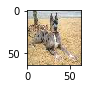

In [71]:
img = new_train_set[100]
img = img.reshape((1,-1)).reshape((64,64,3))
plt.figure(figsize = (1,1))
plt.imshow(img.astype(np.uint8))

In [72]:
# normalization
dog_train_set = (new_train_set - 127.5)/127.5

In [83]:
# define genreator and discriminator in the network

# generator
def generator(x):
    w_ini = tf.truncated_normal_initializer(mean=0, stddev = 0.5)
    b_ini = tf.constant_initializer(0)
    
    # first layer
    w_0 = tf.get_variable('GW_0', [x.get_shape()[1], 512], initializer = w_ini)
    b_0 = tf.get_variable('GB_0', [512], initializer = b_ini)
    output_0 = tf.nn.relu(tf.matmul(x, w_0) + b_0)
    
    # second layer 
    w_1 = tf.get_variable('GW_1', [output_0.get_shape()[1], 1024], initializer = w_ini)
    b_1 = tf.get_variable('GB_1', [1024], initializer = b_ini)
    output_1 = tf.nn.relu(tf.matmul(output_0, w_1) + b_1)
    
    # third layer
    w_2 = tf.get_variable('GW_2', [output_1.get_shape()[1], 2048], initializer = w_ini)
    b_2 = tf.get_variable('GB_2', [2048], initializer = b_ini)
    output_2 = tf.nn.relu(tf.matmul(output_1, w_2) + b_2)
    
    # oupt layer
    w_3 = tf.get_variable('GW_3', [output_2.get_shape()[1], 12288], initializer = w_ini)
    b_3 = tf.get_variable('GB_3', [12288], initializer = b_ini)
    output = tf.nn.tanh(tf.matmul(output_2, w_3) + b_3)
    
    return output

# discriminator
def discriminator(x, drop_out):
    w_ini = tf.truncated_normal_initializer(mean=0, stddev = 0.5)
    b_ini = tf.constant_initializer(0)
    
    # first layer
    w_0 = tf.get_variable('DW_0', [x.get_shape()[1], 2048], initializer = w_ini)
    b_0 = tf.get_variable('DB_0', [2048], initializer = b_ini)
    output_0 = tf.nn.relu(tf.matmul(x, w_0) + b_0)
    output_0 = tf.nn.dropout(output_0, drop_out)
    
    # second layer 
    w_1 = tf.get_variable('DW_1', [output_0.get_shape()[1], 1024], initializer = w_ini)
    b_1 = tf.get_variable('DB_1', [1024], initializer = b_ini)
    output_1 = tf.nn.relu(tf.matmul(output_0, w_1) + b_1)
    output_1 = tf.nn.dropout(output_1, drop_out)
    
    # third layer
    w_2 = tf.get_variable('DW_2', [output_1.get_shape()[1], 512], initializer = w_ini)
    b_2 = tf.get_variable('DB_2', [512], initializer = b_ini)
    output_2 = tf.nn.relu(tf.matmul(output_1, w_2) + b_2)
    output_2 = tf.nn.dropout(output_2, drop_out)
    
    # oupt layer
    w_3 = tf.get_variable('DW_3', [output_2.get_shape()[1], 1], initializer = w_ini)
    b_3 = tf.get_variable('DB_3', [1], initializer = b_ini)
    output = tf.sigmoid(tf.matmul(output_2, w_3) + b_3)
    
    return output

In [90]:
# define parameters
batch_size = 100
lr = 0.0002
train_epoch = 3
tf.reset_default_graph()

In [91]:
# define model
with tf.variable_scope('generator'):
    noise = tf.placeholder(tf.float32, shape=(None, 100))
    g_noise = generator(noise)

with tf.variable_scope('discriminator') as scope:
    drop_out = tf.placeholder(tf.float32, name='drop_out')
    x = tf.placeholder(tf.float32, shape=(None, 12288))
    d_real = discriminator(x, drop_out)
    scope.reuse_variables()
    d_fake = discriminator(g_noise, drop_out)

In [92]:
# variables
t_vars = tf.trainable_variables()
d_vars = [i for i in t_vars if 'D' in i.name]
g_vars = [i for i in t_vars if 'G' in i.name]

In [93]:
# define loss function and optimizer
threshold = 0.001
d_loss = tf.reduce_mean(-tf.log(d_real + threshold) - tf.log(1 - d_fake + threshold))
g_loss = tf.reduce_mean(-tf.log(d_fake + threshold))

d_opt = tf.train.AdamOptimizer(lr).minimize(d_loss, var_list = d_vars)
g_opt = tf.train.AdamOptimizer(lr).minimize(g_loss, var_list = g_vars)

In [96]:
# initialize variables
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [97]:
# train model
for epoch in range(train_epoch):
    g_losses = []
    d_losses = []
    epoch_start  = time.time()
    for i in range(dog_train_set.shape[0]//batch_size):
        xs = dog_train_set[i * batch_size: (i+1) * batch_size]
        ys = np.random.normal(0,1, (batch_size, 100))
        
        # discrimninator loss update
        loss_d, _ = sess.run([d_loss, d_opt], feed_dict={x: xs, noise: ys, drop_out: 0.2})
        d_losses.append(loss_d)
        
        # generator loss update
        ys = np.random.normal(0, 1, (batch_size, 100))
        loss_g, _ = sess.run([g_loss, g_opt], feed_dict = {noise: ys, drop_out: 0.2})
        g_losses.append(loss_g)
    
    epoch_end = time.time()
    cur_epoch_time = epoch_end - epoch_start
    print("Time for epoch {} is {:.02f}".format(epoch+1, cur_epoch_time))
    print("loss_d: {:.03f} loss_g: {:.03f}".format(np.mean(d_losses), np.mean(g_losses)))

print("Finish training!")


Time for epoch 1 is 344.91465282440186
loss_d: 7.041 loss_g: 3.348
Time for epoch 2 is 345.0645010471344
loss_d: 6.998 loss_g: 3.335
Time for epoch 3 is 341.18971395492554
loss_d: 6.993 loss_g: 3.309
Finish training!


In [99]:
y = np.random.normal(0,1, (1, 100))
test = sess.run(g_noise, {noise: y, drop_out: 0.2})

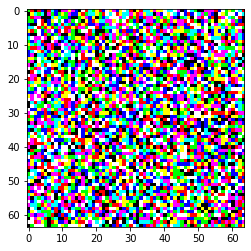

In [104]:
plt.imshow(test.reshape((1, -1)).reshape((64,64,3)).astype(np.uint8))

In [105]:
# model iteration and accuracy
sess.close()

In [ ]:
# generate 10000 new dog images
    